### Appendix

In [2]:
uni_doors = {"505 Bedford House" : (28,19), "149 Architecture" : (12,75), "148 School of Arts" : (12,138), "153" : (53,36), "Sydney Jones Library" : (82,160), "Brett Building" : (35,199), "816 Yoko Ono Lennon Centre" : (60,210), "109 Gordon Stephenson Building" : (110,50), "106 Eleanor Rathbone Building" : (185,65), "120 South Campus Teaching Hub" : (175,130), "804 Vine Court(East)" : (176,153), "805 Vine Court(West)" : (185,240), "152" : (160,12), "104 Music" : (143,32), "111 Latin American Studies" : (174,42), "432 Rendall Building" : (144,63), "107 Roxby Building" : (158,105), "108 Law and Social Justice Building" : (143,111), "425 Chatham Building" : (145,160), "427 Management School" : (196,238)}

- 505 Bedford House
- 149 Architecture
- 148 School of Arts
- 153
- Sydney Jones Library
- Brett Building
- 816 Yoko Ono Lennon Centre
- 109 Gordon Stephenson Building
- 106 Eleanor Rathbone Building
- 120 South Campus Teaching Hub
- 804 Vine Court(East)
- 805 Vine Court(West)
- 152
- 104 Music
- 111 Latin American Studies
- 432 Rendall Building
- 107 Roxby Building
- 108 Law and Social Justice Building
- 425 Chatham Building
- 427 Management School


Start:  804 Vine Court(East)

Destination:  816 Yoko Ono Lennon Centre

Distance: 431.55 m 
Time: 0:02:03.30


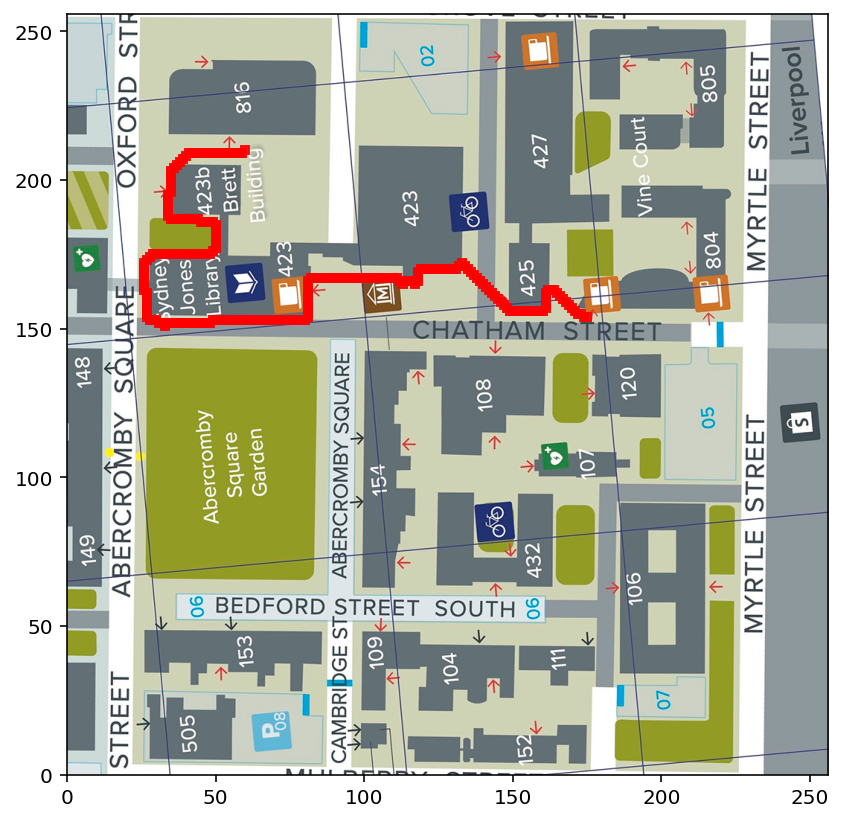

In [4]:
import heapq
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import datetime



def astar(array, start, goal):
    # Define the neighbors of each node
    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    # Create an empty set to store the nodes that have been evaluated
    close_set = set()
    # Create an empty dictionary to store the parent of each node
    came_from = {}
    # Create a dictionary to store the cost of getting from the start node to each node
    gscore = {start:0}
    # Create a dictionary to store the total cost of getting from the start node to the goal node through each node
    fscore = {start:heuristic(start, goal)}
    # Create a heap to store the nodes that need to be evaluated
    oheap = []
    # Add the start node to the heap
    heapq.heappush(oheap, (fscore[start], start))

    # Loop until the heap is empty
    while oheap:
        # Get the node with the lowest total cost
        current = heapq.heappop(oheap)[1]
        # If the current node is the goal node, return the path
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data
        # Add the current node to the set of evaluated nodes
        close_set.add(current)
        # Loop through the neighbors of the current node
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            # Calculate the tentative cost of getting from the start node to the neighbor node
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            # Check if the neighbor node is within the bounds of the array
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:
                    # Check if the neighbor node is a wall
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # If the neighbor node is outside the bounds of the array, it is a wall
                    continue
            else:
                # If the neighbor node is outside the bounds of the array, it is a wall
                continue

            # Check if the neighbor node has already been evaluated and if the tentative cost is greater than or equal to the cost of getting to the neighbor node
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            # Update the parent and cost dictionaries with the new values
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
 
    return False
 
def heuristic(a, b):
    # Calculate the Euclidean distance between two nodes
    return (b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2

# Set the size of the image
size = 256
# Load the image
img_path = 'UoL_map_python.bmp'
im = plt.imread("UoL_map_display.png")
img = cv2.imread(img_path, 0)
# Display the image
im = plt.imshow(im, extent=[0, size, 0, size])
# Convert the image to a numpy array
nmap = np.invert(img)//255

#print list of buildings so the user can see the options
for door in uni_doors:
    print("-", door)

#ask user to input start and destination building
start = input("Start: ")
dest = input("Destination: ")

# Find the shortest path between the start and end points in the image
path = astar(nmap, uni_doors[start], uni_doors[dest])
#plot the path
for node in path:
    plt.plot(node[0], node[1], marker = 's', markersize = 4, color = 'r', alpha = 0.9)
#find the distance and time corresponding to the user inputed path
av_walking_speed = 3.5 #ms^-1
pixtometres = 86.31 / 55 #mpx^-1
distance_path = len(path) * pixtometres
time_path = str(datetime.timedelta(seconds=(distance_path / av_walking_speed)))[:10]
print("Distance: {:.2f} m \nTime: {}".format(distance_path, time_path))


